In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

2024-11-05 19:51:41.630202: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-05 19:51:42.693774: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Data Preprocessing

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
X=dataset.iloc[:, 3:-1].values    #take 3 to one before last
y=dataset.iloc[:, -1].values
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [5]:
print(y)

[1 0 1 ... 1 1 0]


# Encoding categorical data


In [6]:
# Label Encoding the "Gender" column

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:, 2]=le.fit_transform(X[:,2])
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [7]:
# One Hot Encoding the "Geography" column

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

print(X)
# encoded_data will be an array with the one-hot encoded representation of the categorical variable

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [8]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the ANN


In [10]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

In [11]:
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [12]:
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [13]:
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training the ANN

In [14]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

2024-11-05 19:51:49.290236: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


 general guide for selecting optimizers, loss functions, and metrics for various cases in deep learning:

| Case/Task                        | Optimizer                    | Loss Function                | Metrics                                  |
|----------------------------------|------------------------------|------------------------------|------------------------------------------|
| **Binary Classification**        | Adam, RMSprop, SGD           | Binary Crossentropy          | Accuracy, Precision, Recall, F1-Score     |
| **Multiclass Classification**    | Adam, RMSprop, SGD           | Categorical Crossentropy     | Accuracy, Precision, Recall, F1-Score     |
| **Multilabel Classification**    | Adam, RMSprop, SGD           | Binary Crossentropy          | Accuracy, Precision, Recall, F1-Score     |
| **Regression**                   | Adam, RMSprop, SGD           | Mean Squared Error (MSE)     | Mean Absolute Error (MAE), R2 Score      |
| **Object Detection**             | Adam, RMSprop, SGD           | Region Proposal Network (RPN), Smooth L1 Loss | Mean Average Precision (mAP)        |
| **Image Segmentation**           | Adam, RMSprop, SGD           | Crossentropy, Dice Loss      | Intersection over Union (IoU), Dice Coefficient |
| **Generative Adversarial Nets (GAN)** | Adam, RMSprop             | Binary Crossentropy (Discriminator), Various for Generator | FID (Fréchet Inception Distance), Inception Score |
| **Sequence-to-Sequence** (NLP)   | Adam, RMSprop, SGD           | Categorical Crossentropy, Sparse Categorical Crossentropy | BLEU Score, Perplexity                 |
| **Anomaly Detection**            | Adam, RMSprop, SGD           | Mean Squared Error (Reconstruction Error) | Area Under the Receiver Operating Characteristic (AU-ROC) |
| **Transfer Learning**            | Adam, RMSprop, SGD           | Task-specific loss function  | Task-specific evaluation metrics        |


In [15]:
# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.7671 - loss: 0.5691
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.7986 - loss: 0.4610
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.8025 - loss: 0.4405
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.7930 - loss: 0.4412
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.7967 - loss: 0.4290
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.8098 - loss: 0.4191
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.8047 - loss: 0.4316
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8212 - loss: 0.4132
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.8249 - loss: 0.4096
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.8354 - loss: 0.3902
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.8332 - loss: 0.3933
Epoch 12/100
250/25

# Making the predictions and evaluating the model

In [16]:
# Predicting the result of a single observation
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

So, should we say goodbye to that customer?

In [17]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.


# Predicting the test set results

In [18]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


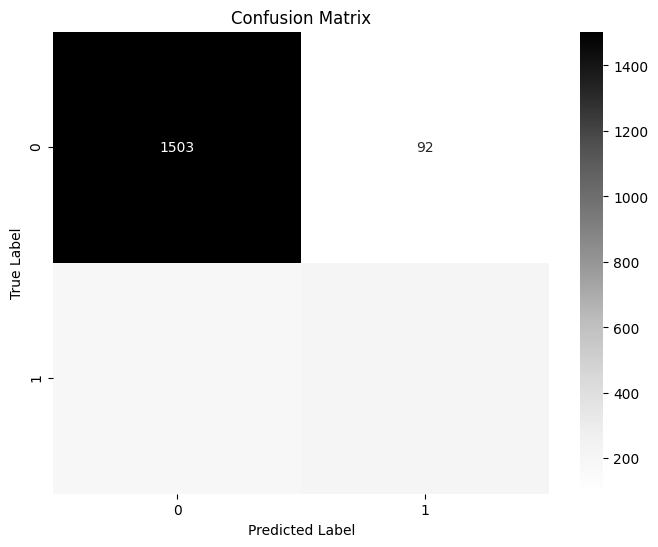

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()


In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.857
